In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("18-concrete_data.csv")

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
#Kolon isimlerine bakalım garip bir şey var mı diye
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace(" ", "_")

In [6]:
df.columns

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength'],
      dtype='object')

In [7]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast_Furnace_Slag  1030 non-null   float64
 2   Fly_Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse_Aggregate    1030 non-null   float64
 6   Fine_Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [9]:
df.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
df.isnull().sum()

Cement                0
Blast_Furnace_Slag    0
Fly_Ash               0
Water                 0
Superplasticizer      0
Coarse_Aggregate      0
Fine_Aggregate        0
Age                   0
Strength              0
dtype: int64

In [11]:
#korelasyona bakalım
df.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast_Furnace_Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly_Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse_Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine_Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


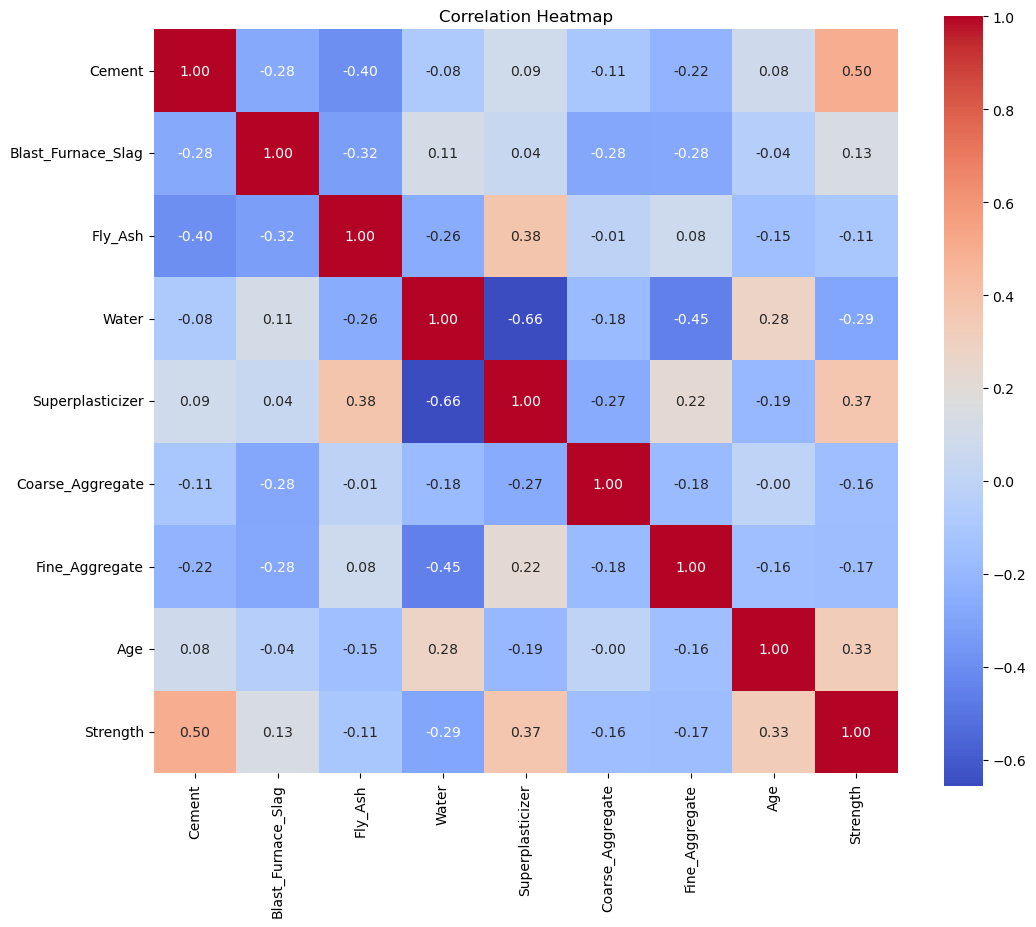

In [12]:
#korelasyon + heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm",square=True)
plt.title("Correlation Heatmap")
plt.show()
#Kırmızı -> güçlü pozitif ilişki
#Mavi -> güçlü negatif ilişki
#Açık renkler -> Zayıf ilişki

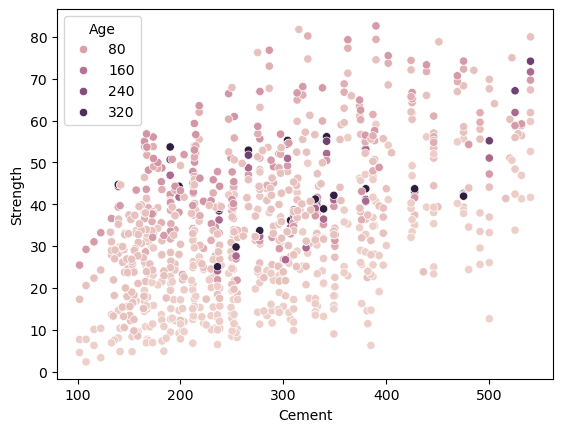

In [13]:
sns.scatterplot(data=df, x="Cement", y="Strength", hue="Age")
plt.show()

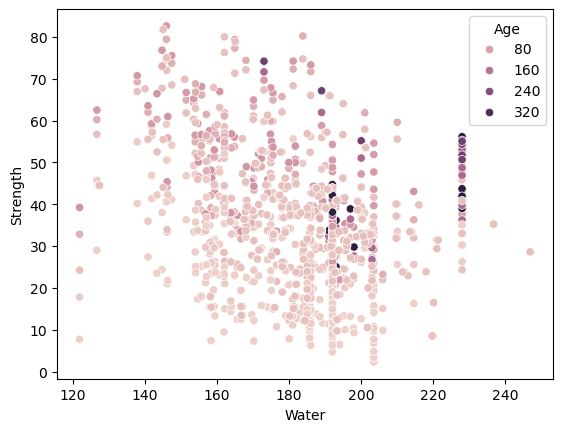

In [14]:
sns.scatterplot(data=df, x="Water", y="Strength", hue="Age")
plt.show()

In [15]:
#Dependent feature --> Strength
X = df.drop("Strength", axis=1)
y = df["Strength"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [18]:
#Manual Gradient Boosting yapmaya çalışalım:
from sklearn.tree import DecisionTreeRegressor

In [19]:
#first weak learner'ı oluşturalım:
tree_reg1 = DecisionTreeRegressor(max_depth = 3)
tree_reg1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [20]:
#tree_reg1.predict(X_train) --> İlk weak learnerın tahmin ettiği değerlerdir. y_pred'i verir bize.
#y_train - tree_reg1.predict(X_train) --> Residual hesaplar. Yani modelin ilk ağaçla açıklayamadığı kısımdır.
#Aslında bu, training datası için R2 score'dur.
y2 = y_train - tree_reg1.predict(X_train)

In [21]:
y2[:5] #5 tanesine bakalım. Bunlar bizim residuallarımız ne kadar hata yaptıysak onlar çıkıyor

919   -15.044359
641    -2.967000
535     2.098039
835   -10.123407
583    -2.334359
Name: Strength, dtype: float64

In [22]:
#Bu hataları bir sonraki weak learner ile azaltmaya çalışıyorduk:
#second weak learner:
tree_reg2 = DecisionTreeRegressor(max_depth=4) #max_depthi aynı tutabilirsiniz, biraz arttırabilirsiniz
tree_reg2.fit(X_train, y2) #bu sefer x_train'i residual olan y2 ile eğitiyoruz çünkü hatayı minimize etmeye calısıyoruz

DecisionTreeRegressor(max_depth=4)

In [23]:
y3 = y2 - tree_reg2.predict(X_train)
y3[:5]

919   -7.776773
641   -0.353441
535    9.365625
835   -4.303430
583   -3.033962
Name: Strength, dtype: float64

In [24]:
#third weak learner
tree_reg3 = DecisionTreeRegressor(max_depth=4)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=4)

In [25]:
y4 = y3 - tree_reg3.predict(X_train)
y4[:5]

919   -8.311212
641   -0.887880
535    8.831186
835   -0.209931
583   -0.406351
Name: Strength, dtype: float64

In [26]:
#En sonunda da son tahminlerimi
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3)) #y_predleri almaya çalışıyoruz şu anda
 

In [27]:
y_pred

array([65.85439489, 28.00473602, 50.37702428, 33.41121182, 37.51107931,
        6.80869054, 33.41121182, 39.35908175, 37.51107931, 19.81785128,
       31.95400272, 35.77628769, 50.37702428, 40.90725143,  6.80869054,
       41.92750386, 63.86062634, 52.87223273, 29.87495516, 42.03414186,
       24.16450206, 19.81785128, 47.90026501, 21.01172244, 41.92750386,
       41.92750386, 63.86062634,  7.80748382, 61.15078798, 21.01172244,
       32.74437086, 28.78327411, 11.12064566,  8.98994195, 51.48305906,
       35.77628769, 42.75403378, 19.41615049, 33.41121182, 13.76899209,
       33.41121182, 41.25684442, 24.16450206, 25.22654633,  2.26795097,
       53.5390737 , 33.41121182,  6.80869054, 77.46596472, 13.61787967,
       33.41121182, 41.92750386, 29.87495516, 57.33810285, 24.87398766,
       33.41121182,  7.80748382, 44.79045937, 33.41121182, 33.41121182,
       13.61787967, 77.46596472, 38.76545445, 24.16450206, 13.76899209,
        7.80748382, 40.90725143, 32.0113235 , 32.0113235 , 35.77

In [28]:
#Şimdi y_test ile bunu kıyaslayacağız
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test,y_pred)

0.8159494658632221

In [30]:
#bir tane daha tree ile deneyelim
tree_reg4 = DecisionTreeRegressor(max_depth=4)
tree_reg4.fit(X_train, y4)

DecisionTreeRegressor(max_depth=4)

In [31]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3, tree_reg4))

In [32]:
r2_score(y_test,y_pred)

0.8164029936095347

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
gbr = GradientBoostingRegressor(n_estimators=3, max_depth=3, learning_rate=0.1)

In [35]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=3)

In [37]:
y_pred = gbr.predict(X_test)
print("R2 score:", r2_score(y_test,y_pred)) #çok düşük çıktı çünkü n_estimators'ı çok düşük tuttuk

R2 score: 0.31671418229216797


In [40]:
#Bu GradientBoostingRegressor'ın standart halidir
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
gbr.fit(X_train,y_train)
y_pred2 = gbr.predict(X_test)
print("R2 score:", r2_score(y_test,y_pred2))

R2 score: 0.924730619815904


### Hyperparameter Tuning

In [41]:
params = {
    "n_estimators": [100,150,200],
    "max_depth": [3,4,5],
    "loss": ["squared_error", "absolute_error", "huber", "quantile"], #default: squared_error
    "learning_rate": [0.01, 0.1, 0.5 ] #default: 0.1
}

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
rscv = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=params, cv=5)

In [48]:
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 150, 200]})

In [49]:
rscv.best_params_

{'n_estimators': 200,
 'max_depth': 5,
 'loss': 'squared_error',
 'learning_rate': 0.1}

In [50]:
y_pred3 = rscv.predict(X_test)
print("R2 score:", r2_score(y_test,y_pred3))

R2 score: 0.9463783447269714
